# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [1]:
import os
import cv2
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1

Download the dataset ([link](https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign)) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

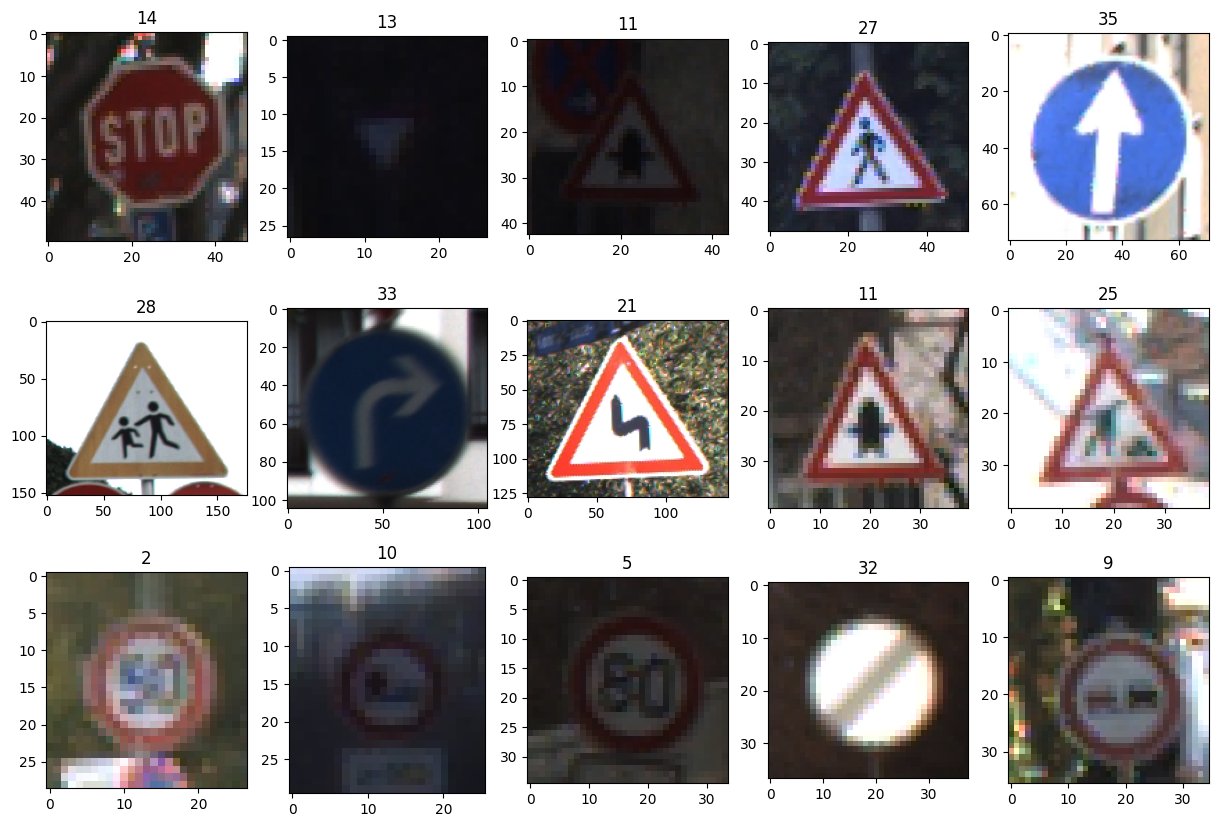

In [12]:
# Load the training labels
root = 'out' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = data.shape[0]

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3, 5, ii + 1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [27]:
data['is_vertical'] = np.where(data.Width < data.Height, 1, 0)
data['size'] = data.Width * data.Height

In [13]:
# Extract class identifiers
# Hint: Check the csv 
ids = data['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

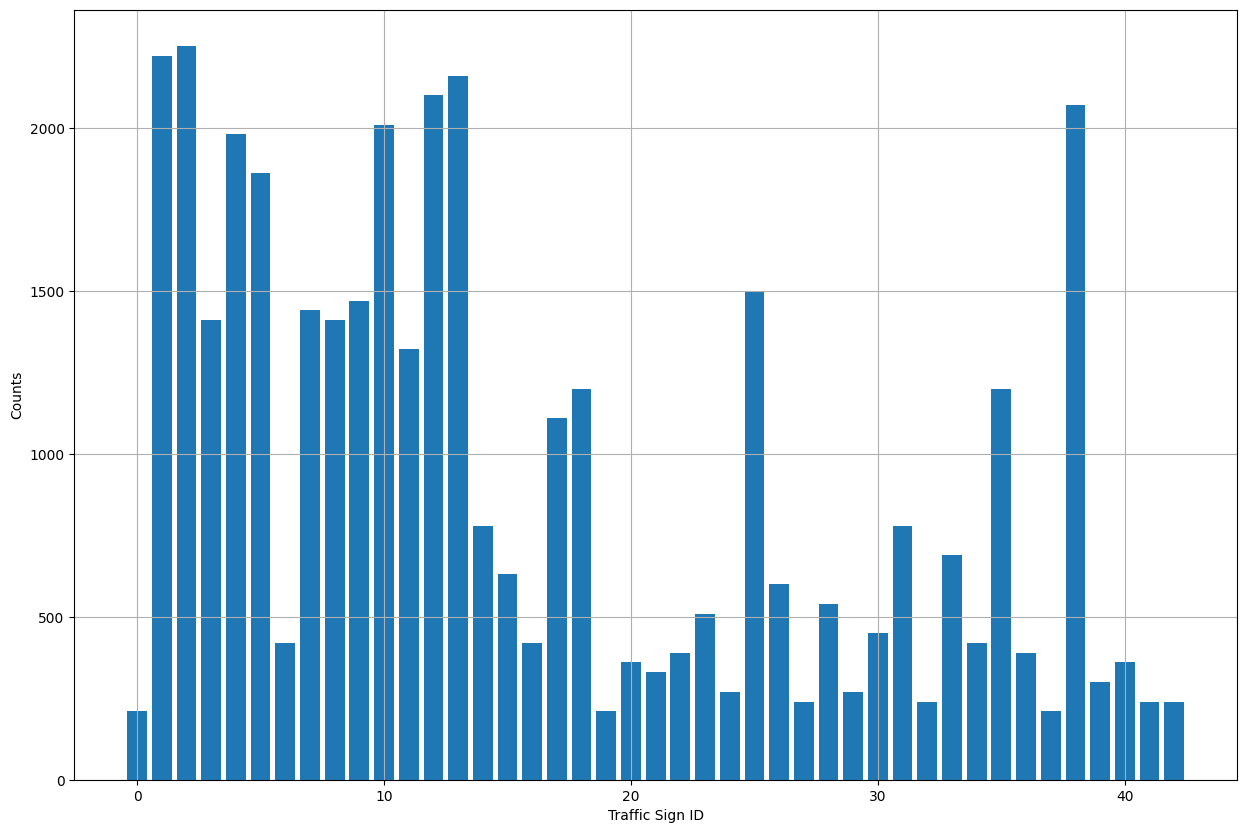

In [24]:
hist = ids.value_counts().sort_index()
plt.bar(hist.index, hist.values), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
*Набор данных не является сбалансированным*, так как количество данных для каждого класса значительно варьируется. Некоторые классы имеют заметно больше данных (свыше 2000), в то время как другие едва достигают до 300
####
* Are there any classes that are (significantly) over-represented or under-represeneted?
Судя по гистограмме распределения данных видно что есть *over-represented* классы (>1000 записей) и *under-represeneted* классы (< 500 записей)

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?

In [37]:
# Метод определяет яркость изображения
def get_brightness(img_path: str) -> float:
    img = cv2.imread(os.path.join(root, img_path))
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return np.round(gray_image.mean())

In [48]:
# метод извлекает из названия файла, дополнительные значения
def parse_image_path(img_path: str) -> tuple:
    file_name = img_path.split('/')[-1].split('.')[0]
    return tuple(file_name.split('_'))

In [86]:

data[['class', 'file_id', 'version_id']] = data.Path.apply(
    lambda x: pd.Series(parse_image_path(x))
)

# добавим значение яркости для каждого файла
data['brightness'] = data.Path.apply(get_brightness)

# добавим значение brightness_range с шагом 50 для каждого файла
bins = range(0, 301, 50)
labels = [f'{i}-{i+50}' for i in bins[:-1]] 
data['brightness_range'] = pd.cut(data['brightness'], bins=bins, labels=labels, right=False)

(Text(0.5, 0, 'Unique versions'), Text(0, 0.5, 'Counts'))

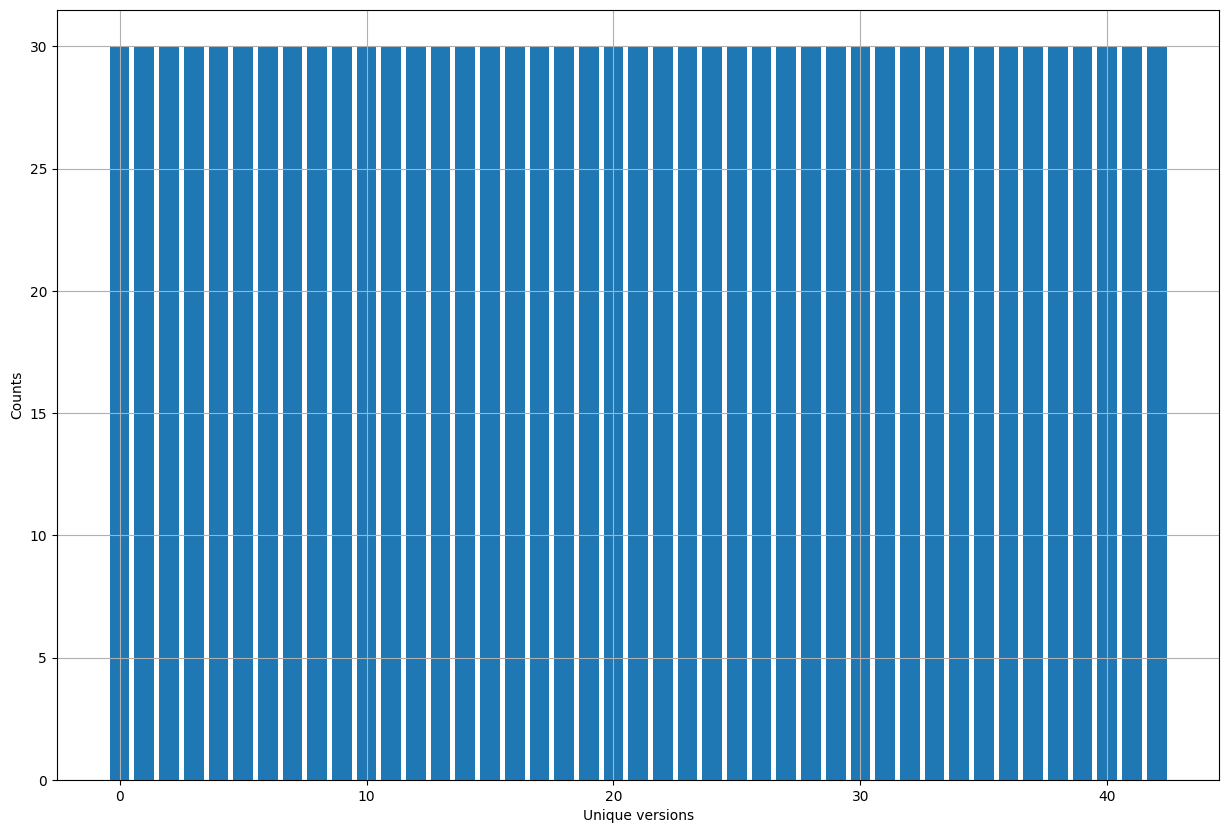

In [88]:
# распределение по версиям файлов для каждого класса
res = data.groupby('ClassId')['version_id'].nunique()
plt.bar(res.index, res.values), plt.grid(True)
plt.xlabel('Unique versions'), plt.ylabel('Counts')

Text(0.5, 1.0, 'Распределение по яркости')

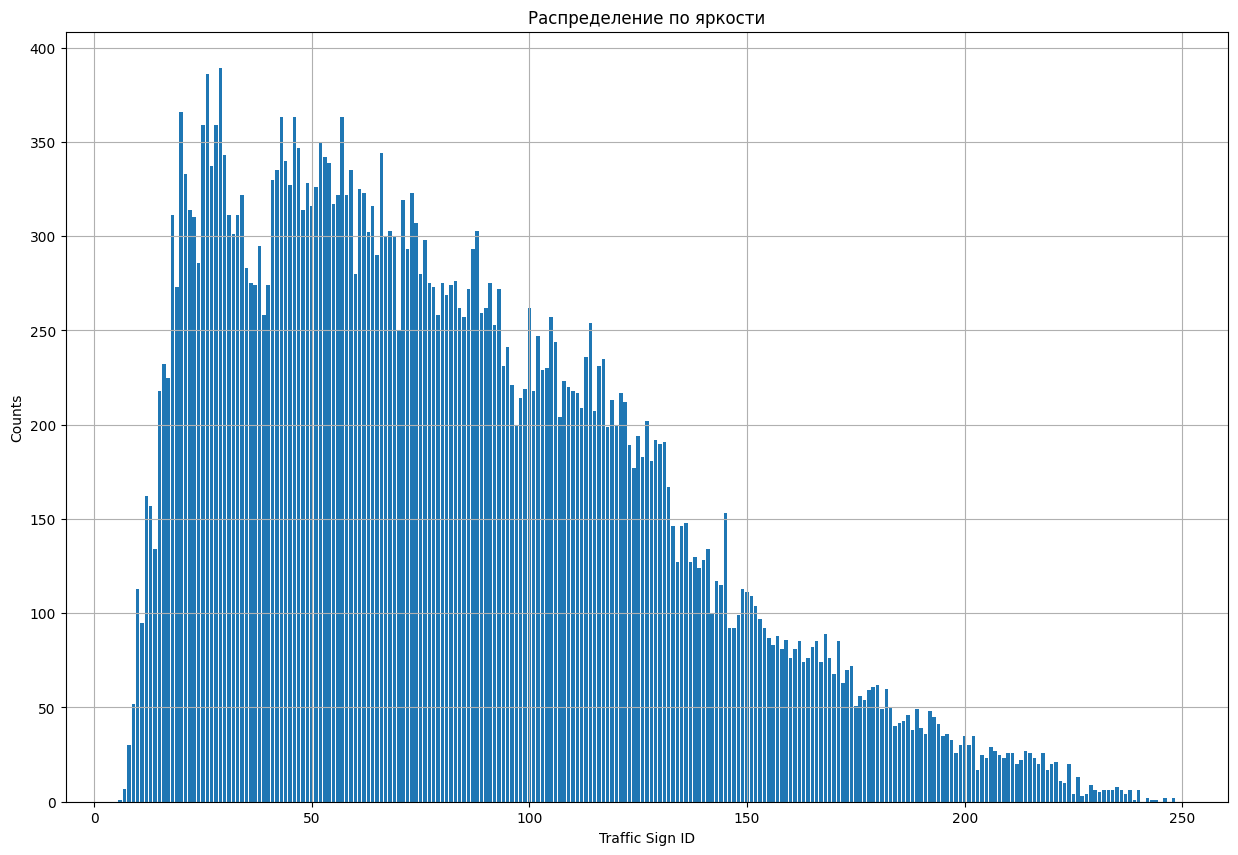

In [87]:

res = data.brightness.value_counts().sort_index()
plt.bar(res.index, res.values), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')
plt.title('Распределение по яркости')

Text(0.5, 1.0, 'Распределение по яркости')

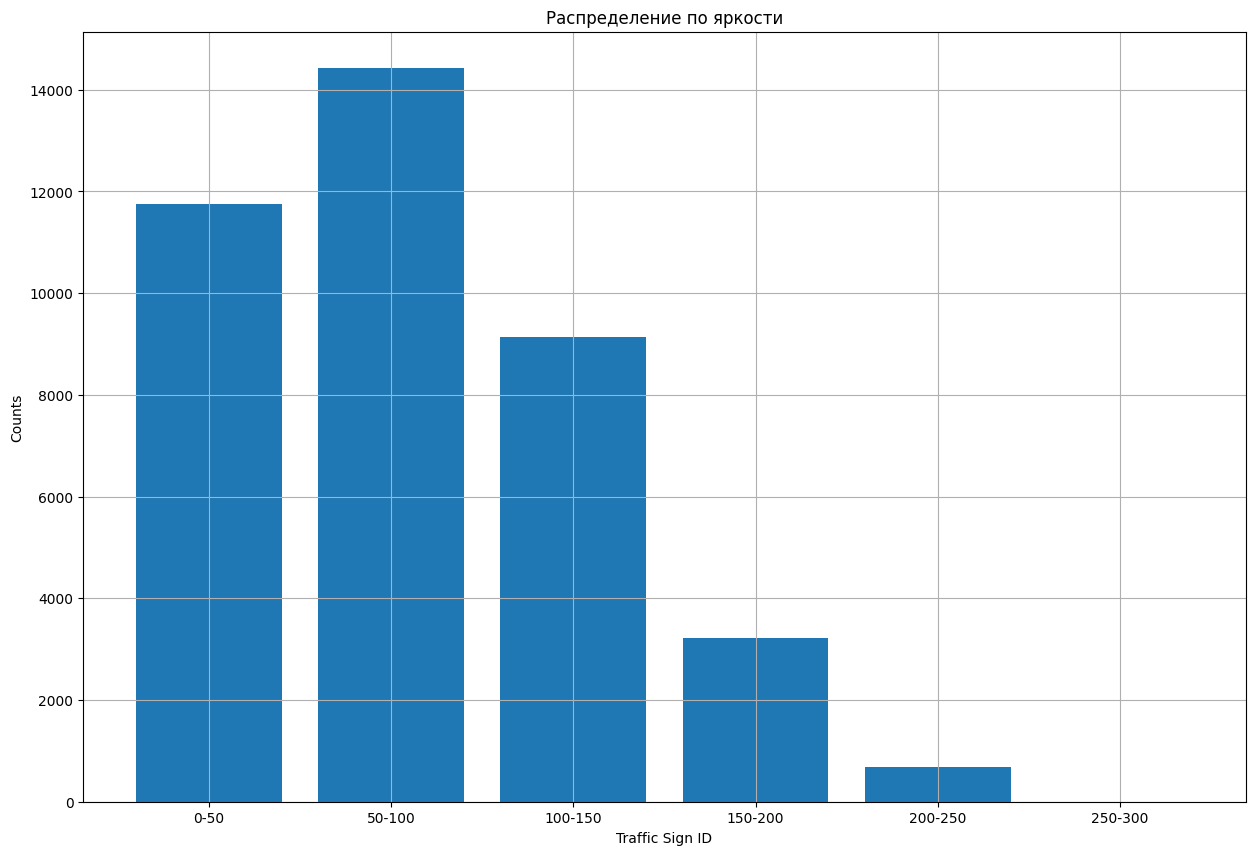

In [103]:
# распределение по brightness_range

result = data.brightness_range.value_counts().sort_index()
plt.bar(result.index, result.values), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')
plt.title('Распределение по яркости')

/tmp/ipykernel_179568/3604782797.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result = data.groupby(['ClassId', 'brightness_range']).size().unstack(fill_value=0)


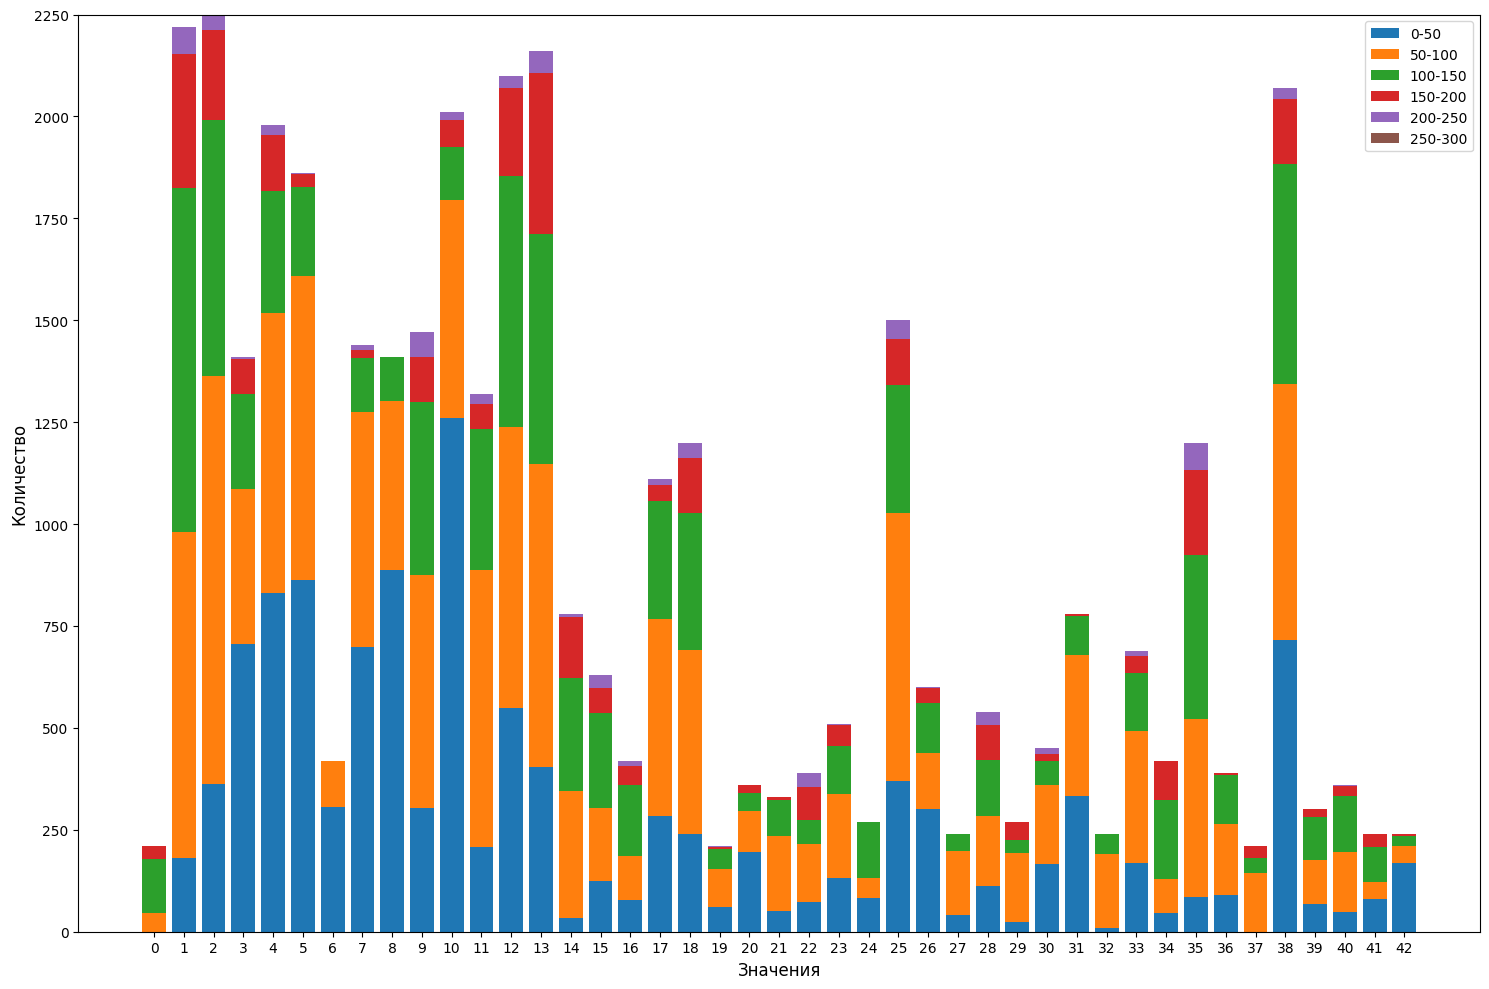

In [104]:
# Яркость изображений для каждого из классов

result = data.groupby(['ClassId', 'brightness_range']).size().unstack(fill_value=0)

x = np.arange(len(result))
bottoms = []
bottom = np.zeros(len(result))
for i, column in enumerate(result.columns):
    bottoms.append(list(bottom))
    bottom += np.array(result[column].values)

for i, column in enumerate(result.columns):
    bottoms.append(bottom)
    plt.bar(x, result[column].values, bottom=bottoms[i], label=column)


# Настройка осей, заголовков и легенды
plt.xlabel('Значения', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.xticks(result.index)  
plt.legend()

# Показать график
plt.tight_layout()
plt.show()

### Выводы
####
1. Анализ изображений показал, что для каждого изображения есть копии с уверичением разрешения и небольшим изменением ракурса. Причем для каждого изображение имеется ровно 30 копий.
2.  Распределение по яркости не равномерное. Однако для всех классов имеются изображения с разной яркостью (видно по последнему графику) 